In [ ]:
# take the corpus of readable and unreadable texts and look at the topics it creates

## Prepare data

In [1]:
import pandas as pd

In [2]:
import pickle

In [3]:
path = './new_cleaned/train_corpus/target_features/'
file = f'{path}/topic_ids_with_target_features_VER5.csv'  # all topics that have comments, I work only with them

In [4]:
topics_with_targets = pd.read_csv(file)

In [5]:
topics_with_targets.head()  # 0 is 'good', 1 is 'bad'

,topic_id,target
0,385,1
1,369,1
2,362,1
3,524,1
4,384,1


In [6]:
topic_id_step_id_map = pickle.load(open('./topic_id_step_id_mapping.pkl', 'rb'))

In [7]:
topic_texts = pd.read_csv('./new_cleaned/topics_all_spacy_lemm.csv')

In [8]:
topic_texts.head()

,step_id,cleaned_texts,num_words,ASL,norm_seconds,lemmatized_texts,lemm_wo_punct
0,12357,""" *heading* So far you have learned quite a lo...",618,25.750000,9.764563,""" * head * so far you have learn quite a lot a...",head so far you have learn quite a lot abou...
1,12691,"""JavaScript was originally developed as a lang...",605,17.285714,4.185289,""" JavaScript be originally develop as a langua...",JavaScript be originally develop as a languag...
2,8112,"""We've already learned what annotations are an...",610,20.333333,7.982623,""" we 've already learn what annotation be and ...",we ve already learn what annotation be and wh...
3,7892,""" *heading* You often hear people speak about ...",1079,21.156863,5.029935,""" * head * you often hear people speak about t...",head you often hear people speak about the ...
4,15809,""" *heading* When you have already learned the ...",633,30.142857,8.795577,""" * head * when you have already learn the bas...",head when you have already learn the basic ...


In [ ]:
# according to split in 'topics_with_targets' create a 'good' corpus and a 'bad' corpus

In [9]:
bad_texts = []
good_texts = []

for i, row in topics_with_targets.iterrows():
    corr_step_id = topic_id_step_id_map[row.topic_id]
    corr_lemm_text = topic_texts[topic_texts.step_id == corr_step_id].lemm_wo_punct.values[0]
    
    if row.target == 0:
        good_texts.append(corr_lemm_text)
    elif row.target == 1:
        bad_texts.append(corr_lemm_text)
    else:
        raise('Target is not in [1, 0]')
        
print(len(bad_texts))
print(len(good_texts))

223
897


In [10]:
bad_texts[0]

'  head  the datum be store on disk under certain address  for a computer  such address be number  it use they to find the correspond information  however  human be not that good at memorize set of number  it be much easy for we to name our datum  for example  family photo  November report  and so on  therefore  the concept of a file be invent  in a file  one can store some information under any user  friendly name  let us take a close look at what file be   head     img  a file be associate with a piece of datum  as for its name  typically there exist some restriction in the system  for example  filename must contain only those character that be support by a specific file system  there be different type of content of the file  text  photo  music  video  etc  the type of information store in a file define the file format  in order for the computer to be able to distinguish what format a certain file have  file extension be invent   head     img  find out the format of a file right away

In [ ]:
# also remove stopwords from them

In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [11]:
def clean_from_stopwords(text):
    splitted = text.split()
    cleaned_list = [el for el in splitted if el not in stop_words]
    return ' '.join(cleaned_list)

In [12]:
bad_texts_cleaned = []
good_texts_cleaned = []

for text in bad_texts:
    bad_texts_cleaned.append(clean_from_stopwords(text))
    
for text in good_texts:
    good_texts_cleaned.append(clean_from_stopwords(text))
    

## Perform LSA

https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
from sklearn.decomposition import TruncatedSVD

In [16]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.6, smooth_idf=True)

X = vectorizer.fit_transform(bad_texts_cleaned + good_texts_cleaned)

In [17]:
X.shape # check shape of the document-term matrix

(1120, 15868)

In [18]:
# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)

In [19]:
svd_model.fit(X)

TruncatedSVD(n_components=10, n_iter=100, random_state=122)

In [20]:
X_transformed = svd_model.transform(X)

In [21]:
X_transformed.shape

(1120, 10)

In [22]:
#### VERSION 4 -- ALL TOPICS THAT HAVE COMMENTS ####

terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic " + str(i) + ": ")
    print([t[0] for t in sorted_terms])

Topic 0: 
['math', 'method', 'function', 'class', 'element', 'value', 'string']
Topic 1: 
['math', 'matrix', 'vector', 'node', 'graph', 'linear', 'probability']
Topic 2: 
['class', 'method', 'object', 'instance', 'constructor', 'field', 'math']
Topic 3: 
['array', 'element', 'index', 'list', 'method', 'collection', 'value']
Topic 4: 
['function', 'string', 'variable', 'character', 'argument', 'value', 'operator']
Topic 5: 
['string', 'character', 'match', 'pattern', 'substring', 'method', 'regex']
Topic 6: 
['table', 'thread', 'loop', 'operator', 'query', 'statement', 'column']
Topic 7: 
['thread', 'loop', 'exception', 'program', 'array', 'method', 'execute']
Topic 8: 
['file', 'loop', 'array', 'operator', 'variable', 'type', 'directory']
Topic 9: 
['array', 'thread', 'table', 'column', 'database', 'query', 'row']


In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic " + str(i) + ": ")
    print([t[0] for t in sorted_terms])


* Topic 0: **general concepts** ['math', 'method', 'function', 'class', 'element', 'value', 'string']
* Topic 1: **mathematics** ['math', 'matrix', 'vector', 'node', 'graph', 'linear', 'probability']
* Topic 2: **OOP** ['class', 'method', 'object', 'instance', 'constructor', 'field', 'math']
* Topic 3: **collections** ['array', 'element', 'index', 'list', 'method', 'collection', 'value']
* Topic 4: **functions (?)** ['function', 'string', 'variable', 'character', 'argument', 'value', 'operator']
* Topic 5: **strings** ['string', 'character', 'match', 'pattern', 'substring', 'method', 'regex']
* Topic 6: **???** ['table', 'thread', 'loop', 'operator', 'query', 'statement', 'column']
* Topic 7: **program execution** ['thread', 'loop', 'exception', 'program', 'array', 'method', 'execute']
* Topic 8: **files and OS (?)** ['file', 'loop', 'array', 'operator', 'variable', 'type', 'directory']
* Topic 9: **databases** ['array', 'thread', 'table', 'column', 'database', 'query', 'row']

## Visualization

In [28]:
#!pip3 install umap

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3564 sha256=a48aa7182da66602c917ebaf394f07c8a83029f4158935a2e7d99595f81e9ddd
  Stored in directory: /home/anna/.cache/pip/wheels/df/22/c9/3de2d976b162d3f90c60ed7e415f344d0630518a501093e7b1
Successfully built umap


In [31]:
#!pip3 install umap-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 88 kB 1.6 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.1 MB 1.9 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=9dc5684024c66d6a388e7474960b4a78dca73df06d1a531d2ae6889e78c58c0a
  Stored in directory: /home/anna/.cache/pip/wheels/54/ca/cf/35a4f9a744b0bce9549e4e492261bef3903434d0118f3ee858
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54287 sha256=e9fab373cf92dcb00544c9b34436f158be00471783ebc5ac03363f284ad9ab3e
  Stored in directory: /home/anna/.cache/pip/wheels/fd/8a/9e/58bdbe4211581dd2aeffe2ce46020a000bf67127afac24e772
Successfully built umap-learn pynndescent


In [23]:
# visualization
import umap.umap_ as umap

/home/anna/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [24]:
X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

In [40]:
X_topics[0]

array([ 0.07227875,  0.00318305, -0.03563841, -0.00054061,  0.02779302,
        0.02863548,  0.05717058, -0.0175189 ,  0.03111181,  0.0177481 ])

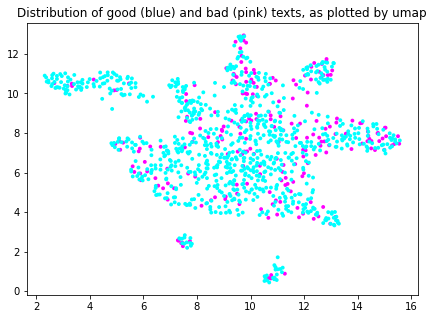

In [43]:
########## THIS IS FOR VERSION 5 #########

targets = [ [1] * len(bad_texts) + [0] * len(good_texts) ]

# each dot represents a document 
# colors represent our 2 groups - blue is 'good', pink is 'bad'

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
            c = targets,
            s = 15,
            cmap = 'cool',
            edgecolor='none')
plt.title('Distribution of good (blue) and bad (pink) texts, as plotted by umap')
plt.show()

## Get all matrices from SVD

In [26]:
from sklearn.utils.extmath import randomized_svd

In [27]:
X.shape

(1120, 15868)

In [28]:
U, Sigma, VT = randomized_svd(X, 
                              n_components=10,
                              n_iter=100,
                              random_state=122)

In [29]:
print(U.shape, Sigma.shape, VT.shape)

(1120, 10) (10,) (10, 15868)


In [41]:
U[0]

array([ 0.00980147,  0.00052452, -0.00821998, -0.00013018,  0.00703483,
        0.0080446 ,  0.0162839 , -0.0051336 ,  0.00955412,  0.00560695])

In [42]:
U[1]

array([ 0.00955404,  0.00303738, -0.00488731, -0.00223654,  0.002308  ,
        0.00432306,  0.01054926, -0.00518334,  0.00303227,  0.00264663])

In [30]:
X_transformed.shape

(1120, 10)

In [31]:
svd_model.singular_values_.shape  # this is Sigma: singular values signify topic importance

(10,)

In [33]:
svd_model.components_.shape  # this is VT -- distribution of words across topics

(10, 15868)

In [32]:
print(U == X_transformed)
print()
print(Sigma == svd_model.singular_values_)
print()
print(VT == svd_model.components_)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]

[ True  True  True  True  True  True  True  True  True  True]

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [ ]:
# U and X_transformed are not the same
# X_transformed = SVD.fit_transform(X) = U*np.diag(Sigma) which is != U

In [33]:
X_transformed[:2]

array([[ 0.07227875,  0.00318305, -0.03563841, -0.00054061,  0.02779302,
         0.02863548,  0.05717058, -0.0175189 ,  0.03111181,  0.0177481 ],
       [ 0.07045415,  0.01843245, -0.02118934, -0.00928816,  0.00911841,
         0.01538832,  0.03703703, -0.01768865,  0.00987421,  0.00837757]])

In [34]:
U[:2]

array([[ 0.00980147,  0.00052452, -0.00821998, -0.00013018,  0.00703483,
         0.0080446 ,  0.0162839 , -0.0051336 ,  0.00955412,  0.00560695],
       [ 0.00955404,  0.00303738, -0.00488731, -0.00223654,  0.002308  ,
         0.00432306,  0.01054926, -0.00518334,  0.00303227,  0.00264663]])

## Cluster docs according to what their main topic is

In [35]:
topics_with_targets.target.values

array([1, 1, 1, ..., 0, 0, 0])

In [36]:
best_topics = dict()

for list_topics, doc_id in zip(U, topics_with_targets.topic_id.values):
    list_topics = list(list_topics)
    best_topic = list_topics.index(max(list_topics))
    best_topics[doc_id] = best_topic

In [37]:
best_topics

{385: 6,
 369: 6,
 362: 5,
 524: 1,
 384: 6,
 781: 1,
 719: 1,
 643: 1,
 1147: 1,
 112: 4,
 28: 2,
 15: 0,
 124: 2,
 192: 8,
 301: 0,
 4: 3,
 27: 4,
 148: 0,
 185: 5,
 147: 5,
 309: 8,
 98: 5,
 172: 8,
 193: 5,
 59: 2,
 14: 8,
 32: 4,
 99: 3,
 90: 8,
 116: 2,
 307: 6,
 2: 2,
 17: 2,
 19: 8,
 25: 6,
 103: 2,
 75: 2,
 20: 6,
 128: 2,
 89: 8,
 356: 0,
 9: 5,
 60: 7,
 324: 2,
 167: 2,
 31: 5,
 6: 2,
 181: 5,
 8: 2,
 123: 2,
 491: 2,
 317: 2,
 77: 7,
 86: 7,
 38: 2,
 37: 0,
 173: 8,
 159: 2,
 12: 3,
 5: 2,
 518: 5,
 323: 2,
 111: 0,
 129: 2,
 316: 0,
 724: 5,
 49: 2,
 113: 0,
 85: 2,
 849: 9,
 80: 2,
 1033: 2,
 48: 2,
 1495: 0,
 1671: 0,
 483: 7,
 539: 0,
 660: 3,
 1004: 3,
 1105: 6,
 1093: 0,
 1314: 3,
 1315: 3,
 1198: 3,
 273: 3,
 260: 0,
 315: 8,
 191: 7,
 410: 1,
 313: 0,
 270: 3,
 502: 0,
 503: 0,
 117: 2,
 255: 0,
 346: 3,
 321: 5,
 494: 0,
 537: 3,
 391: 0,
 559: 6,
 438: 0,
 607: 8,
 608: 0,
 577: 5,
 652: 6,
 673: 6,
 656: 9,
 708: 6,
 485: 6,
 680: 2,
 289: 3,
 709: 0,
 872: 0,
 7

In [38]:
# all documents for which the most pronounced topic is 9
[el for el in best_topics if best_topics[el] == 9]

[849,
 656,
 288,
 1473,
 715,
 1070,
 1247,
 928,
 917,
 1034,
 1056,
 1296,
 1301,
 1396,
 1359,
 1360,
 1234,
 1398,
 528,
 519,
 766,
 768,
 861,
 860,
 670,
 765,
 858,
 859,
 882,
 833,
 767,
 892,
 1120,
 1161,
 1176,
 1160,
 881,
 1235,
 1644,
 1594,
 1734,
 1783,
 1468,
 1467,
 500,
 514,
 716,
 1884,
 1978,
 852,
 1976,
 1986,
 1348,
 1362,
 1839]

## Save results of SVD to use them as a new set of features

In [54]:
lsa_df = pd.DataFrame(X_transformed)

In [56]:
lsa_df.columns = ['topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10']

In [58]:
# add topic_ids
lsa_df['topic_id'] = topics_with_targets.topic_id.values

In [59]:
lsa_df.head()

,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic_id
0,0.150044,0.049077,-0.063434,-0.016152,0.051941,0.095804,0.065959,-0.022702,0.033782,0.019681,362
1,0.274386,0.378059,-0.022950,0.073009,-0.096538,0.001527,0.097993,-0.056784,0.048809,0.153477,524
2,0.112809,0.004343,-0.052788,0.003488,0.047481,0.041063,0.074780,-0.021828,0.045878,0.025094,384
3,0.321835,0.610472,0.061429,-0.006924,-0.056966,0.015125,0.027587,-0.006050,0.027774,0.057805,781
4,0.325092,0.464082,0.006443,-0.043563,0.031883,0.084394,0.038440,-0.002160,0.026950,0.021789,719


In [61]:
# change the order of columns
lsa_df = lsa_df[['topic_id', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10']]

In [62]:
lsa_df.head()

,topic_id,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10
0,362,0.150044,0.049077,-0.063434,-0.016152,0.051941,0.095804,0.065959,-0.022702,0.033782,0.019681
1,524,0.274386,0.378059,-0.022950,0.073009,-0.096538,0.001527,0.097993,-0.056784,0.048809,0.153477
2,384,0.112809,0.004343,-0.052788,0.003488,0.047481,0.041063,0.074780,-0.021828,0.045878,0.025094
3,781,0.321835,0.610472,0.061429,-0.006924,-0.056966,0.015125,0.027587,-0.006050,0.027774,0.057805
4,719,0.325092,0.464082,0.006443,-0.043563,0.031883,0.084394,0.038440,-0.002160,0.026950,0.021789


In [63]:
lsa_df.to_csv('./new_cleaned/train_corpus/train_features/LSA_features.csv', index=False)

In [64]:
lsa_df.shape[0]

1120

In [65]:
lsa_df[lsa_df.topic_id == 1825]  # this is one of the topics from VER 1, and it doesn't exist in VER 4
# as well as topics 1826, 1930, 1512 (probably it's topics with high likes that didn't have any comments)

,topic_id,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10
